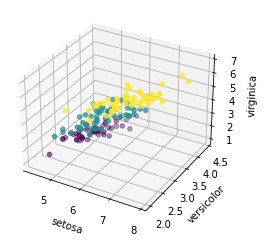

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
import math
#import data set
iris =datasets.load_iris()
X = iris.data[:,:3]
Y = iris.target

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(X[:,0],X[:,1],X[:,2],c=Y)

ax.set_xlabel(iris.target_names[0])
ax.set_ylabel(iris.target_names[1])
ax.set_zlabel(iris.target_names[2])
plt.show()
# tree types of flowers


In [15]:
#---------------------------Preprocessing ---------------------------#
# Normalize the data 
X[:,0] = X[:,0]/max(X[:,0])
X[:,1] = X[:,1]/max(X[:,1])
X[:,2] = X[:,2]/max(X[:,2])

#centered the data
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])
X[:,2] = X[:,2] - np.mean(X[:,2])


#Categorical variables into indicators
Y2 = pd.get_dummies(Y) 
Y2 = np.array(Y2)
N2 , D2 = X.shape
print(str(N2) + " "+ str(D2))
X1 = X.T
N2 , D2 = X1.shape
print(str(N2) + " "+str(D2))


150 3
3 150


In [16]:
print(X1[:,0])

[-0.09409283  0.10060606 -0.34173913]


In [18]:
#Separate data into train set and test set
from sklearn.model_selection import train_test_split
X_train , X_test  ,Y_train ,Y_Test = train_test_split(X,Y2, test_size=0.3,random_state=0)
N2 , D2 = X_train.shape
print(str(N2) + " "+str(D2))
X_train = np.append(X_train, np.ones((N2,1))*-1,axis=1)
N_test , D_test = X_test.shape
X_test = np.append(X_test, np.ones((N_test,1))*-1,axis=1)
print(X_train[0,:])
print(type(X_test[0,:]))
print(type(Y_train))
print(Y_Test[0,:])

105 3
[-0.10675105 -0.24030303 -0.0373913  -1.        ]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 0 1]


In [19]:



#Hidden layer
Nhl  = 10  # entries 
Number_weights_per_neurom = D2+1 # The bias weight is taking care with the 1
weights_hidden_layer = Number_weights_per_neurom*Nhl
Whl = np.random.rand(Nhl,Number_weights_per_neurom)   # matrix   2x 3
Output = np.zeros((Nhl,1))
Sensitividad_hl = np.zeros(((Nhl,1) ))
Sensitividad2_hl = np.zeros(((Nhl,1) ))
Senns_hl = np.zeros(((Nhl,1) ))
dp_hl = np.zeros((Nhl,Number_weights_per_neurom),dtype=float) 

#Output layer
Nol = 3
Number_weights_per_neurom_ol = Nhl+1
weights_output_layer = Number_weights_per_neurom_ol*Nol
Wol =   np.random.rand(Nol,Number_weights_per_neurom_ol)
Outpu_ol = np.zeros(3)
Sensitividad_ol = np.zeros(((Nol,1) ))
Sensitividad2_ol = np.zeros(((Nol,1) ))
Senns_ol = np.zeros(((Nol,1) ))
dp_ol = np.zeros((Nol,Number_weights_per_neurom_ol))   # delta weith
error_ol =  np.zeros(((Nol,1) ))

alpha = 0.1 #learning factor

In [ ]:
#print(X_train[0,:])
#
#aux =  np.sum(Whl*X_train[0,:],axis=1)
#
#Output =  1/(1+np.exp(-aux))
#
##print(Output)
#Xol = []
#Xol = np.append(Output,-1 )
#print(Xol)
#
#
#
#aux3 = np.sum(Wol[0,:]*Xol)
#aux4 = np.sum(Wol[1,:]*Xol)
#aux5 = np.sum(Wol[2,:]*Xol)
#Outpu_ol[0] = 1/(1+ np.exp(-aux3))
#Outpu_ol[1] = 1/(1+ np.exp(-aux4))
#Outpu_ol[2] = 1/(1+ np.exp(-aux5))
#
#
#error_ol = np.sum( Y_train[0,:] - Outpu_ol)
#Error_iteracion = Error_iteracion + error_ol*error_ol
#
#Sensitividad_ol = Outpu_ol*(1-Outpu_ol)*error_ol
#
#
#print(Sensitividad_ol)
#
#dp_ol[0,:] = alpha*Xol*Sensitividad_ol[0]
#dp_ol[1,:] = alpha*Xol*Sensitividad_ol[1]
#dp_ol[2,:] = alpha*Xol*Sensitividad_ol[2]
#
#
#Sensitividad_hl[0] =  Output[0]*(1-Output[0])*(Sensitividad_ol[0]*Wol[0,0]  +  Sensitividad_ol[1]*Wol[1,0]  + Sensitividad_ol[2]*Wol[2,0])
#Sensitividad_hl[1] =  Output[1]*(1-Output[1])*(Sensitividad_ol[0]*Wol[0,1]  +  Sensitividad_ol[1]*Wol[1,1]  + Sensitividad_ol[2]*Wol[2,1])
#Sensitividad_hl[2] =  Output[2]*(1-Output[2])*(Sensitividad_ol[0]*Wol[0,2]  +  Sensitividad_ol[1]*Wol[1,2]  + Sensitividad_ol[2]*Wol[2,2])
#Sensitividad_hl[3] =  Output[3]*(1-Output[3])*(Sensitividad_ol[0]*Wol[0,3]  +  Sensitividad_ol[1]*Wol[1,3]  + Sensitividad_ol[2]*Wol[2,3])
#Sensitividad_hl[4] =  Output[4]*(1-Output[4])*(Sensitividad_ol[0]*Wol[0,4]  +  Sensitividad_ol[1]*Wol[1,4]  + Sensitividad_ol[2]*Wol[2,4])
#Sensitividad_hl[5] =  Output[5]*(1-Output[5])*(Sensitividad_ol[0]*Wol[0,5]  +  Sensitividad_ol[1]*Wol[1,5]  + Sensitividad_ol[2]*Wol[2,5])
#Sensitividad_hl[6] =  Output[6]*(1-Output[6])*(Sensitividad_ol[0]*Wol[0,6]  +  Sensitividad_ol[1]*Wol[1,6]  + Sensitividad_ol[2]*Wol[2,6])
#Sensitividad_hl[7] =  Output[7]*(1-Output[7])*(Sensitividad_ol[0]*Wol[0,7]  +  Sensitividad_ol[1]*Wol[1,7]  + Sensitividad_ol[2]*Wol[2,7])
#Sensitividad_hl[8] =  Output[8]*(1-Output[8])*(Sensitividad_ol[0]*Wol[0,8]  +  Sensitividad_ol[1]*Wol[1,8]  + Sensitividad_ol[2]*Wol[2,8])
#Sensitividad_hl[9] =  Output[9]*(1-Output[9])*(Sensitividad_ol[0]*Wol[0,9]  +  Sensitividad_ol[1]*Wol[1,9]  + Sensitividad_ol[2]*Wol[2,9])
#
#dp_hl[0] = alpha*X_train[0,:]*Sensitividad_hl[0]
#dp_hl[1] = alpha*X_train[0,:]*Sensitividad_hl[1]
#dp_hl[2] = alpha*X_train[0,:]*Sensitividad_hl[2]
#dp_hl[3] = alpha*X_train[0,:]*Sensitividad_hl[3]
#dp_hl[4] = alpha*X_train[0,:]*Sensitividad_hl[4]
#dp_hl[5] = alpha*X_train[0,:]*Sensitividad_hl[5]
#dp_hl[6] = alpha*X_train[0,:]*Sensitividad_hl[6]
#dp_hl[7] = alpha*X_train[0,:]*Sensitividad_hl[7]
#dp_hl[8] = alpha*X_train[0,:]*Sensitividad_hl[8]
#dp_hl[9] = alpha*X_train[0,:]*Sensitividad_hl[9]
#
#
#Whl = Whl + dp_hl 
#
#Wol= Wol + dp_ol 
#	

In [25]:
error_d = 0.01 #Desired error
E_p = 100 #Actual error
E_total =[]
Error_iteracion = 0

epocas = 0 
print(E_p)
while E_p >= error_d:
	#X2 = input("Continuamos?")
	Error_iteracion = 0  # clean the error on each iteration
	#for para cambiar cada iteracion 
	for i in range(0,N2):
		#print(X_train[i,:])
		aux =  np.sum(Whl*X_train[i,:],axis=1)

		Output =  1/(1+np.exp(-aux))

		


		#Output last layer calculate the entries for the last later
		Xol = []
		Xol = np.append(Output,-1 )

		aux3 = np.sum(Wol[0,:]*Xol)
		aux4 = np.sum(Wol[1,:]*Xol)
		aux5 = np.sum(Wol[2,:]*Xol)
		Outpu_ol[0] = 1/(1+ np.exp(-aux3))
		Outpu_ol[1] = 1/(1+ np.exp(-aux4))
		Outpu_ol[2] = 1/(1+ np.exp(-aux5))

		#print("Salida " +  str(Outpu_ol) +    " deseado  " + str(Y[i]))

		#Error
		error_ol = ( Y_train[i,:] - Outpu_ol)
		#print(error_ol)
		#error_ol = np.sum(error_ol)
		#print(error_ol)
		Error_iteracion = Error_iteracion + error_ol*error_ol
		#print(Error_iteracion)

		###############Backpropagtion weight correction #######################

		#sensitiviti output layer 
		Sensitividad_ol = Outpu_ol*(1-Outpu_ol)*error_ol
		#print(Sensitividad_ol)

		#calculate the Weith adjustment output layer

		dp_ol[0,:] = alpha*Xol*Sensitividad_ol[0]
		dp_ol[1,:] = alpha*Xol*Sensitividad_ol[1]
		dp_ol[2,:] = alpha*Xol*Sensitividad_ol[2]
		#dp_ol = alpha*Xol*Sensitividad_ol
		



		#Sensitiviti hidden layer
		Sensitividad_hl[0] =  Output[0]*(1-Output[0])*(Sensitividad_ol[0]*Wol[0,0]  +  Sensitividad_ol[1]*Wol[1,0]  + Sensitividad_ol[2]*Wol[2,0])
		Sensitividad_hl[1] =  Output[1]*(1-Output[1])*(Sensitividad_ol[0]*Wol[0,1]  +  Sensitividad_ol[1]*Wol[1,1]  + Sensitividad_ol[2]*Wol[2,1])
		Sensitividad_hl[2] =  Output[2]*(1-Output[2])*(Sensitividad_ol[0]*Wol[0,2]  +  Sensitividad_ol[1]*Wol[1,2]  + Sensitividad_ol[2]*Wol[2,2])
		Sensitividad_hl[3] =  Output[3]*(1-Output[3])*(Sensitividad_ol[0]*Wol[0,3]  +  Sensitividad_ol[1]*Wol[1,3]  + Sensitividad_ol[2]*Wol[2,3])
		Sensitividad_hl[4] =  Output[4]*(1-Output[4])*(Sensitividad_ol[0]*Wol[0,4]  +  Sensitividad_ol[1]*Wol[1,4]  + Sensitividad_ol[2]*Wol[2,4])
		Sensitividad_hl[5] =  Output[5]*(1-Output[5])*(Sensitividad_ol[0]*Wol[0,5]  +  Sensitividad_ol[1]*Wol[1,5]  + Sensitividad_ol[2]*Wol[2,5])
		Sensitividad_hl[6] =  Output[6]*(1-Output[6])*(Sensitividad_ol[0]*Wol[0,6]  +  Sensitividad_ol[1]*Wol[1,6]  + Sensitividad_ol[2]*Wol[2,6])
		Sensitividad_hl[7] =  Output[7]*(1-Output[7])*(Sensitividad_ol[0]*Wol[0,7]  +  Sensitividad_ol[1]*Wol[1,7]  + Sensitividad_ol[2]*Wol[2,7])
		Sensitividad_hl[8] =  Output[8]*(1-Output[8])*(Sensitividad_ol[0]*Wol[0,8]  +  Sensitividad_ol[1]*Wol[1,8]  + Sensitividad_ol[2]*Wol[2,8])
		Sensitividad_hl[9] =  Output[9]*(1-Output[9])*(Sensitividad_ol[0]*Wol[0,9]  +  Sensitividad_ol[1]*Wol[1,9]  + Sensitividad_ol[2]*Wol[2,9])
		#calculate the Weith adjustment hiddem  layer
		dp_hl[0] = alpha*X_train[i,:]*Sensitividad_hl[0]
		dp_hl[1] = alpha*X_train[i,:]*Sensitividad_hl[1]
		dp_hl[2] = alpha*X_train[i,:]*Sensitividad_hl[2]
		dp_hl[3] = alpha*X_train[i,:]*Sensitividad_hl[3]
		dp_hl[4] = alpha*X_train[i,:]*Sensitividad_hl[4]
		dp_hl[5] = alpha*X_train[i,:]*Sensitividad_hl[5]
		dp_hl[6] = alpha*X_train[i,:]*Sensitividad_hl[6]
		dp_hl[7] = alpha*X_train[i,:]*Sensitividad_hl[7]
		dp_hl[8] = alpha*X_train[i,:]*Sensitividad_hl[8]
		dp_hl[9] = alpha*X_train[i,:]*Sensitividad_hl[9]

		# weith adjustment 
		#hidden layer
		Whl = Whl + dp_hl 

		#outpu layer
		#Wol = Wol + dp_ol
		Wol= Wol + dp_ol 
		#END iteration
	
	E_p = math.sqrt(np.sum(Error_iteracion))/N2
	E_total.append(E_p)
	print(E_p)
	#print(epocas)
	epocas+=1
	#end epoca

100
0.027946476035201027
0.025659421262747756
0.025279550814481987
0.025185362191124078
0.025144000725783874
0.02511579816198685
0.02509174314182468
0.025069235523387915
0.025047418932430062
0.025025992339426636
0.025004845382976305
0.024983935576107865
0.024963245014805728
0.02494276468272924
0.024922488656641976
0.024902411960558195
0.024882529795884987
0.024862837297504985
0.024843329488775847
0.024824001306798828
0.02480484764706331
0.024785863407951775
0.024767043528471762
0.02474838301782163
0.024729876977408072
0.024711520616565657
0.024693309263292516
0.0246752383711656
0.024657303523388997
0.02463950043472564
0.02462182495188525
0.024604273052801107
0.024586840845116167
0.024569524564114608
0.02455232057027242
0.024535225346551483
0.024518235495528968
0.024501347736426173
0.024484558902084362
0.02446786593591984
0.024451265888882395
0.024434755916432745
0.024418333275550947
0.024401995321783297
0.024385739506332993
0.024369563373198257
0.024353464556360283
0.024337440777022417

Entrenamiento finalizado......Se demoro 3039


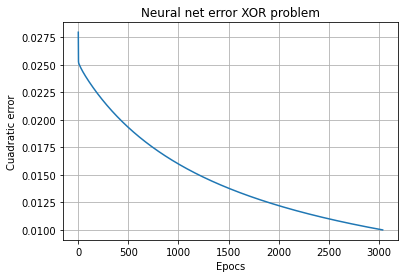

In [26]:
print("Entrenamiento finalizado......Se demoro "+ str(epocas))
ax= plt.subplot()
Epocas = range(epocas)
ax.plot(Epocas, E_total)
ax.set(xlabel='Epocs', ylabel='Cuadratic error',
       title='Neural net error XOR problem')
ax.grid()


plt.show()

In [27]:
N2 , D2 = X_test.shape

print(X_test.shape)
for i in range(0,N2):
		#print(X_train[i,:])
	aux =  np.sum(Whl*X_test[i,:],axis=1)
	Output =  1/(1+np.exp(-aux))
	
	#Output last layer calculate the entries for the last later
	Xol = []
	Xol = np.append(Output,-1 )
	aux3 = np.sum(Wol[0,:]*Xol)
	aux4 = np.sum(Wol[1,:]*Xol)
	aux5 = np.sum(Wol[2,:]*Xol)
	Outpu_ol[0] = 1/(1+ np.exp(-aux3))
	Outpu_ol[1] = 1/(1+ np.exp(-aux4))
	Outpu_ol[2] = 1/(1+ np.exp(-aux5))
	#print("Salida " +  str(Outpu_ol) +    " deseado  " + str(Y[i]))
	#Error
	error_ol = ( Y_Test[i,:] - Outpu_ol)
	print(str(Y_Test[i,0])+"    "  +str(Y_Test[i,1])+"    "  +str(Y_Test[i,2])+"    "  + str(Outpu_ol[0])  +"    "  + str(Outpu_ol[1])  +"    "  + str(Outpu_ol[2]))
	#print(error_ol)
	#error_ol = np.sum(error_ol)
	#print(error_ol)
	Error_iteracion = Error_iteracion + error_ol*error_ol
E_p = math.sqrt(np.sum(Error_iteracion))/N2

(45, 4)
0    0    1    4.265808341137997e-05    0.0032066581336671137    0.9985382462909477
0    1    0    0.0019217727151814655    0.9978003018064973    0.0007793524104447858
1    0    0    0.9888301945442904    0.016330086670175114    4.908745952675006e-09
0    0    1    5.811540474190777e-06    1.1878983604097053e-05    0.9999983582163002
1    0    0    0.9832837104639328    0.02562525128365492    9.084402635443827e-09
0    0    1    6.8294154166788285e-06    1.2649331258265586e-05    0.9999980285048659
1    0    0    0.9870340713240402    0.019288156170576956    6.5117790135403524e-09
0    1    0    0.0007464693395506419    0.9665163467504096    0.019727373392168412
0    1    0    0.00044765679338354235    0.8859066456472859    0.09300271694184381
0    1    0    0.0033068563688596173    0.9988859415204825    0.00020084583070110424
0    0    1    1.046269694832072e-05    5.742114784223535e-05    0.9999887727090585
0    1    0    0.0012093013012929742    0.9884218192053607    0.00478

In [28]:
print(E_p*100)

4.358100173711943
